In [2]:
"""
Author: Vamsi
Date Created: 12/07/2023
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Selecting the correct files

30-6-23\Flux_TDep_100mK00001.dat


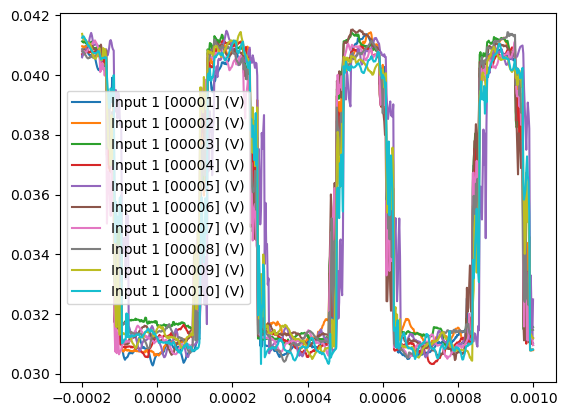

30-6-23\Flux_TDep_110mK00001.dat


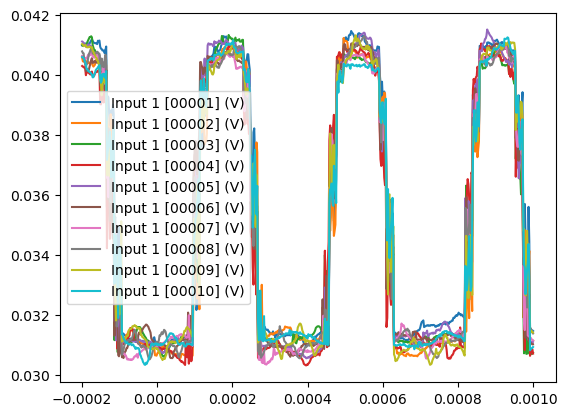

30-6-23\Flux_TDep_11mK00001.dat


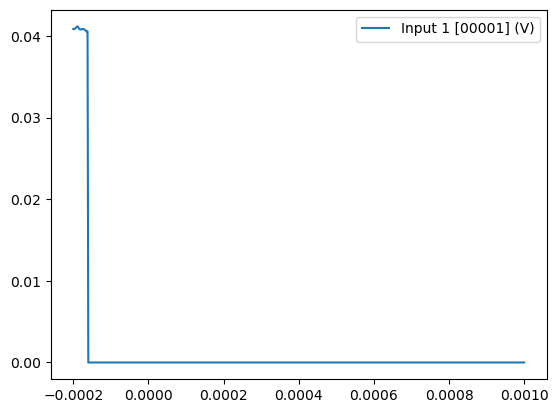

30-6-23\Flux_TDep_11mK_x2000001.dat


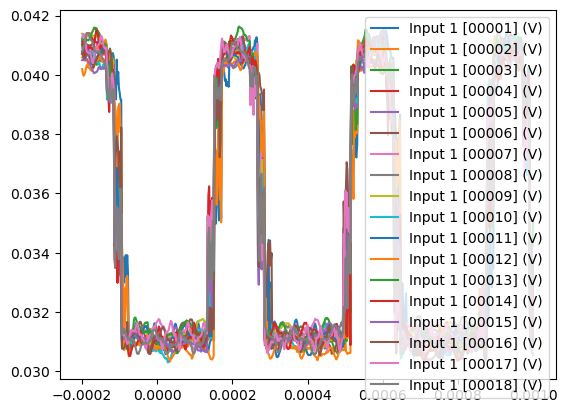

30-6-23\Flux_TDep_120mK00001.dat


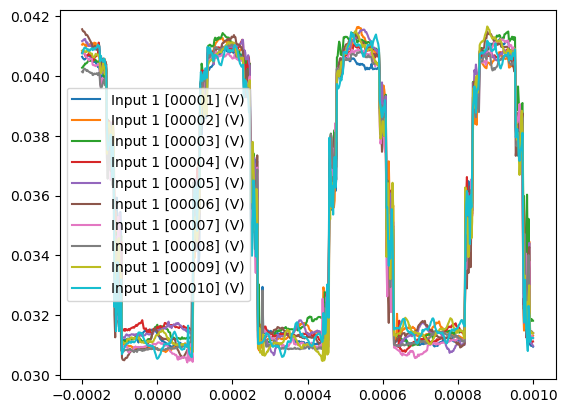

30-6-23\Flux_TDep_130mK00001.dat


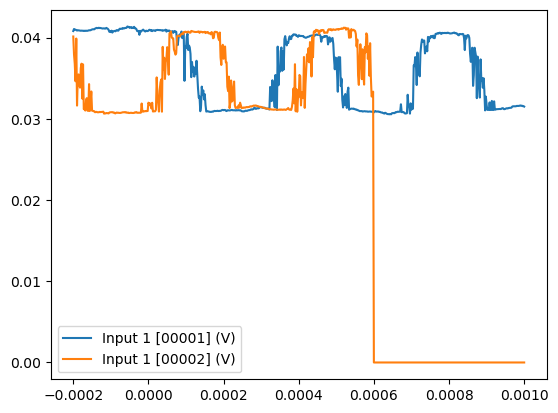

30-6-23\Flux_TDep_130mK_200001.dat


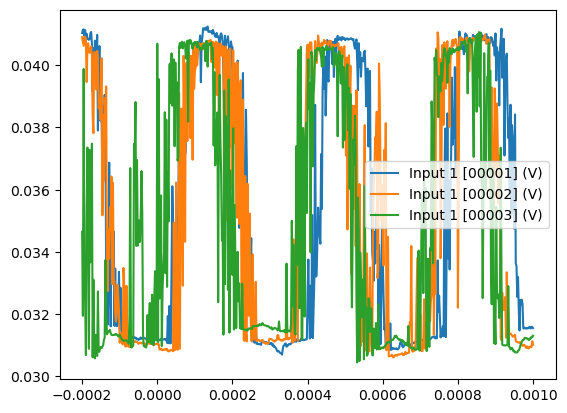

30-6-23\Flux_TDep_130mK_300001.dat


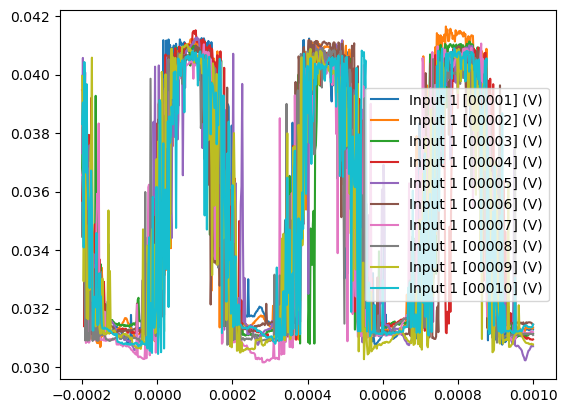

30-6-23\Flux_TDep_140mK00001.dat


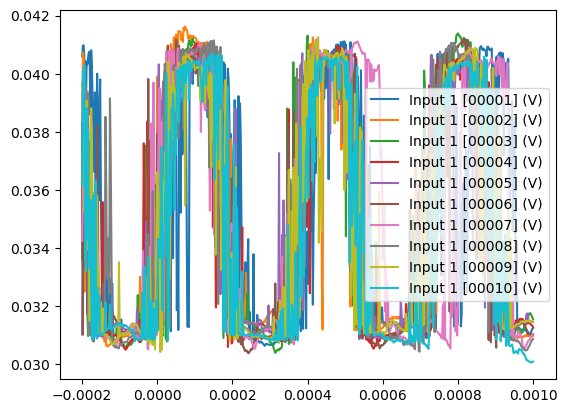

30-6-23\Flux_TDep_140mK_redo00001.dat


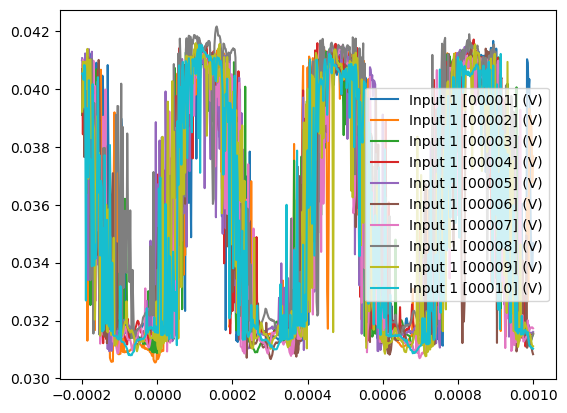

30-6-23\Flux_TDep_150mK00001.dat


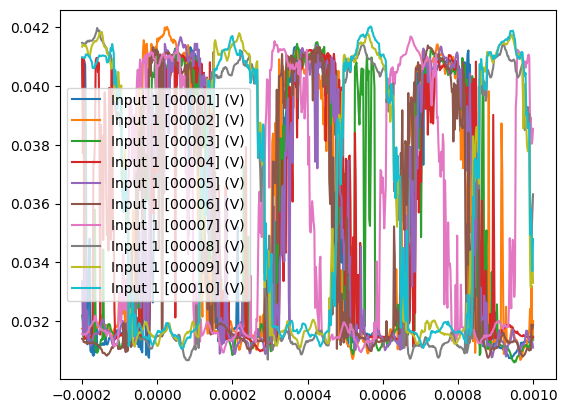

30-6-23\Flux_TDep_150mK_repeat00001.dat


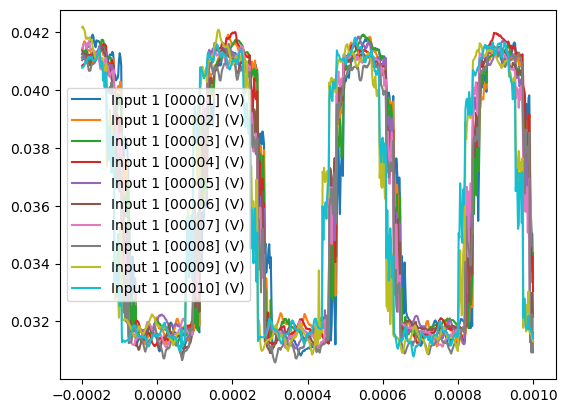

30-6-23\Flux_TDep_16mK00001.dat


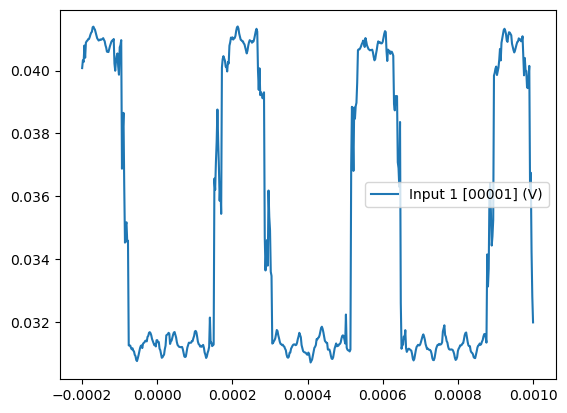

30-6-23\Flux_TDep_170mK00001.dat


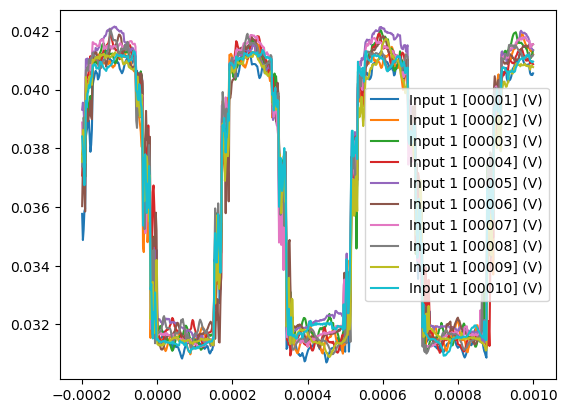

30-6-23\Flux_TDep_200mK00001.dat


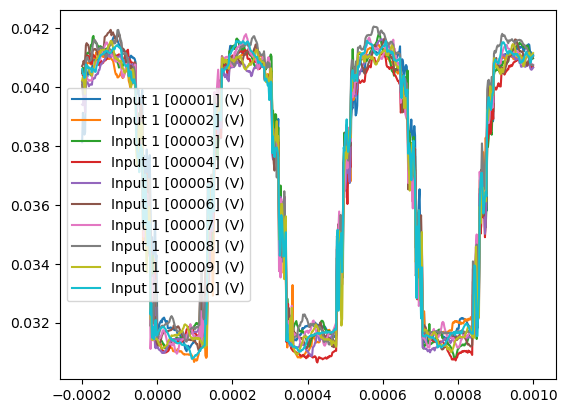

30-6-23\Flux_TDep_20mK_x2000001.dat


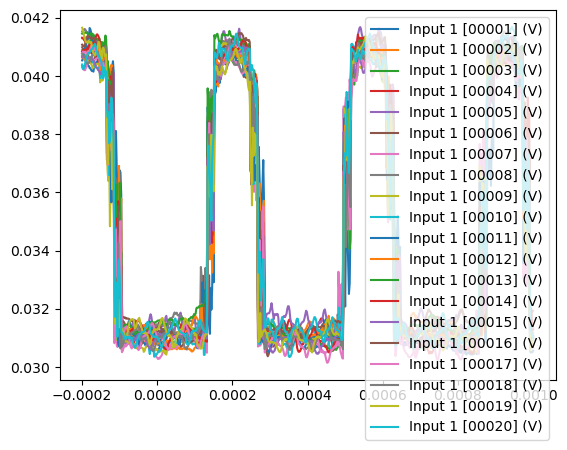

30-6-23\Flux_TDep_250mK00001.dat


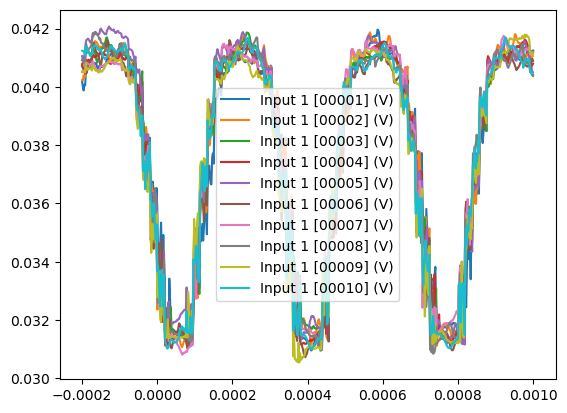

30-6-23\Flux_TDep_300mK00001.dat


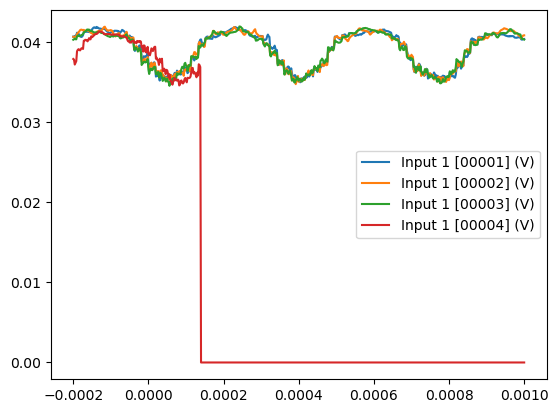

30-6-23\Flux_TDep_300mK_200001.dat


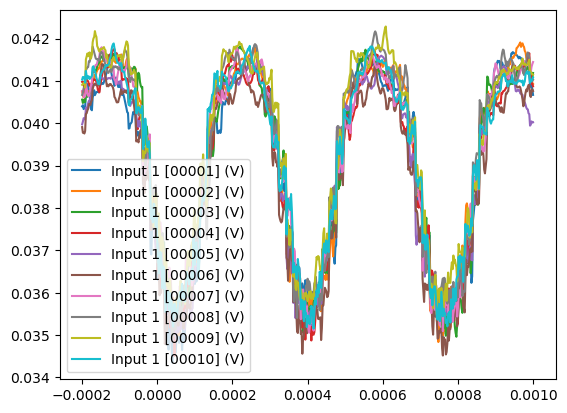

30-6-23\Flux_TDep_30mK_x2000001.dat


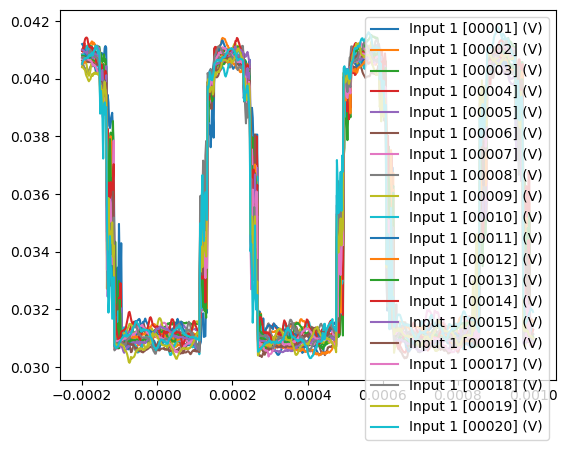

30-6-23\Flux_TDep_350mK00001.dat


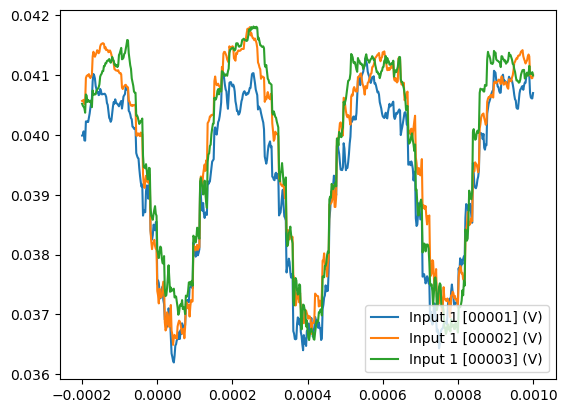

30-6-23\Flux_TDep_350mK_200001.dat


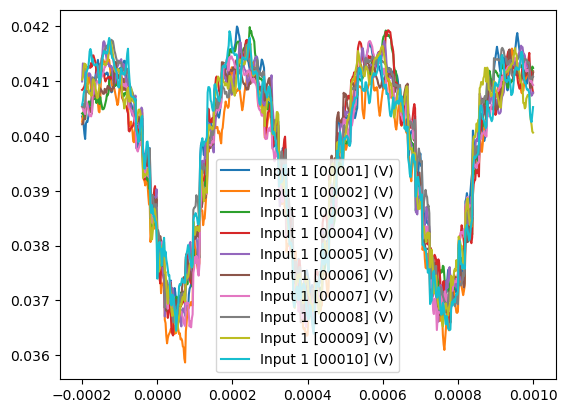

30-6-23\Flux_TDep_400mK00001.dat


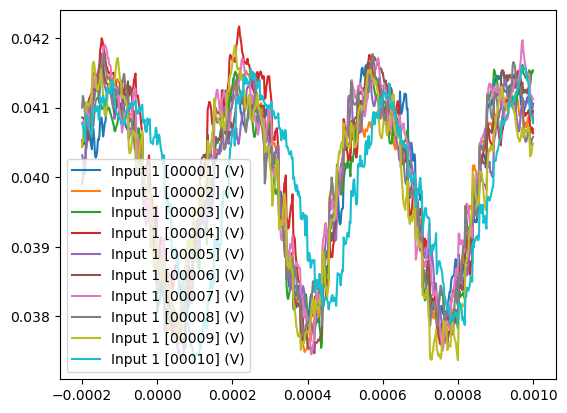

30-6-23\Flux_TDep_400mK_200001.dat


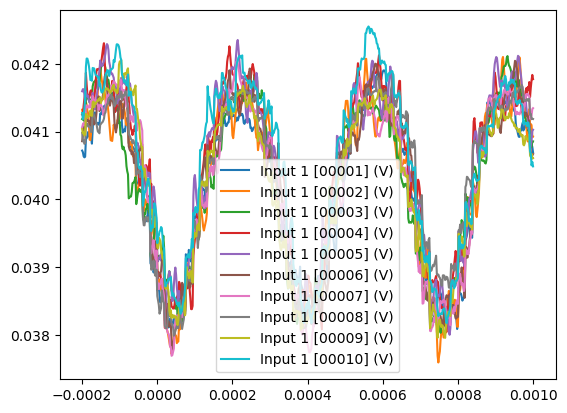

30-6-23\Flux_TDep_40mK00001.dat


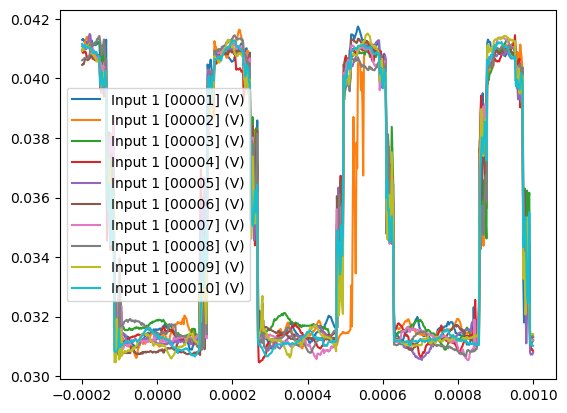

30-6-23\Flux_TDep_40mK_3lobes00001.dat


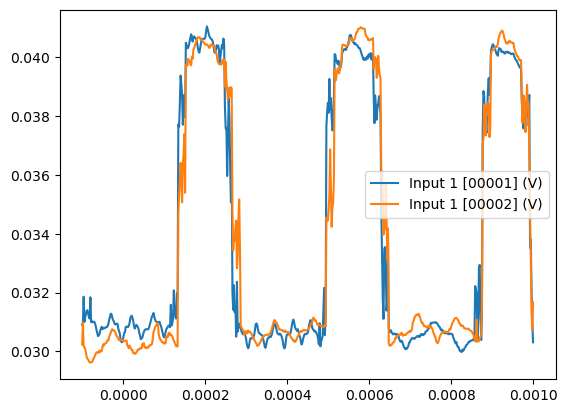

30-6-23\Flux_TDep_40mK_3lobes00002.dat


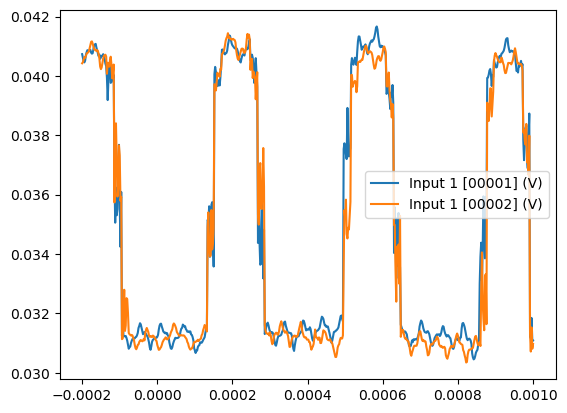

30-6-23\Flux_TDep_40mK_x2000001.dat


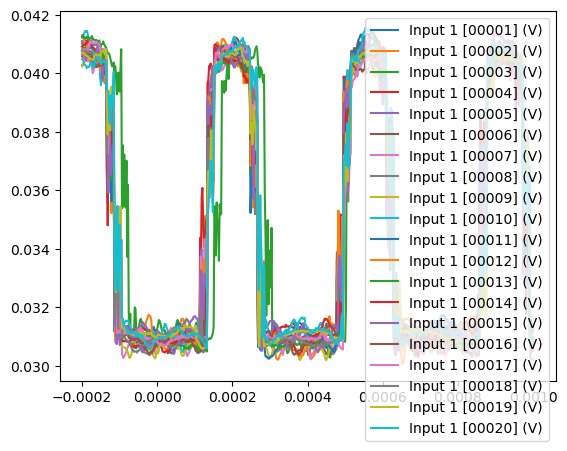

30-6-23\Flux_TDep_50mK00001.dat


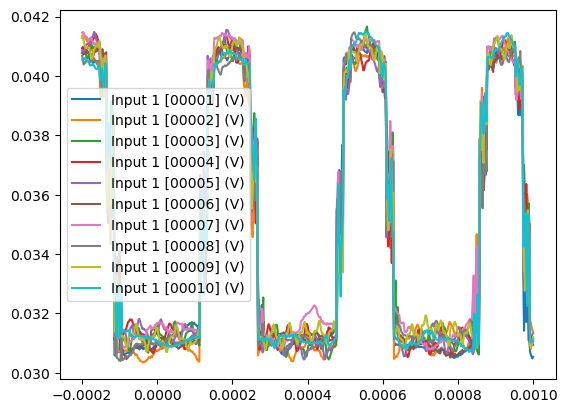

30-6-23\Flux_TDep_50mK_lobes00001.dat


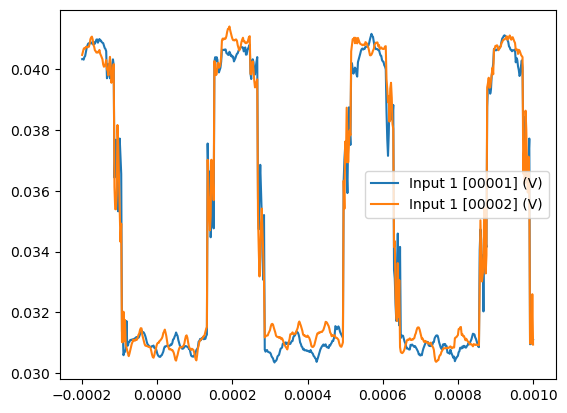

30-6-23\Flux_TDep_50mK_lobes00002.dat


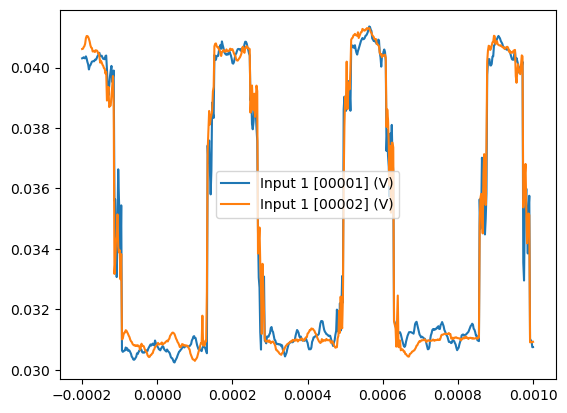

30-6-23\Flux_TDep_60mK00001.dat


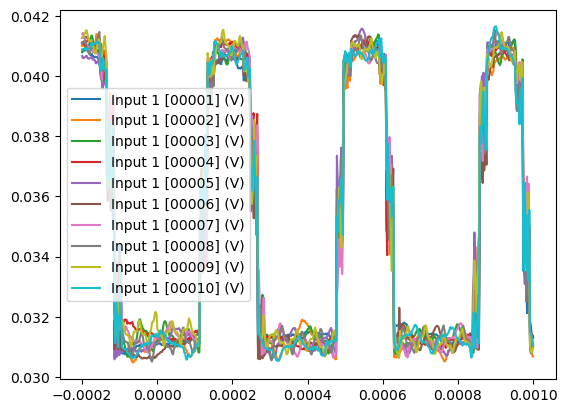

30-6-23\Flux_TDep_70mK00001.dat


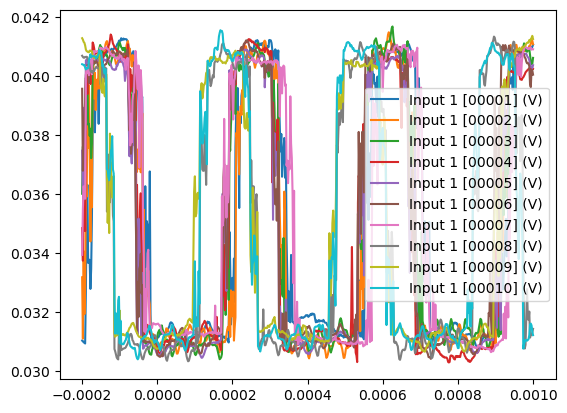

30-6-23\Flux_TDep_75mK_lobes00001.dat


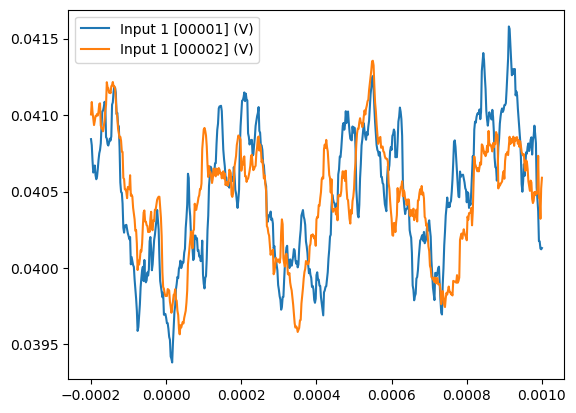

30-6-23\Flux_TDep_80mK00001.dat


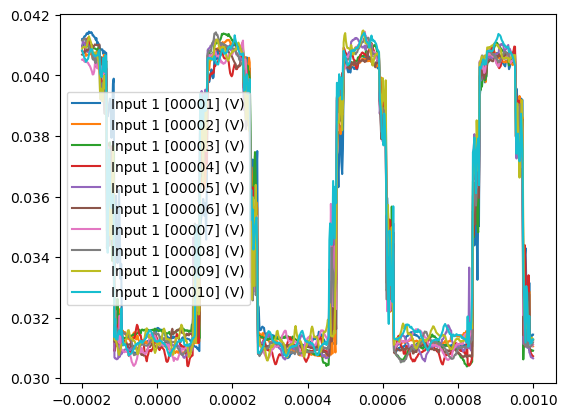

30-6-23\Flux_TDep_90mK00001.dat


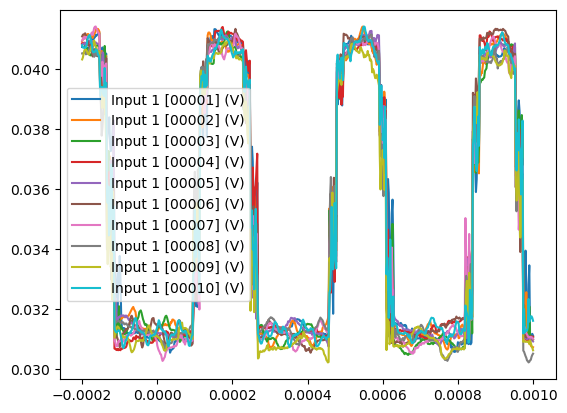

30-6-23\Flux_TDep_whilecooling_from750mK spike00001.dat


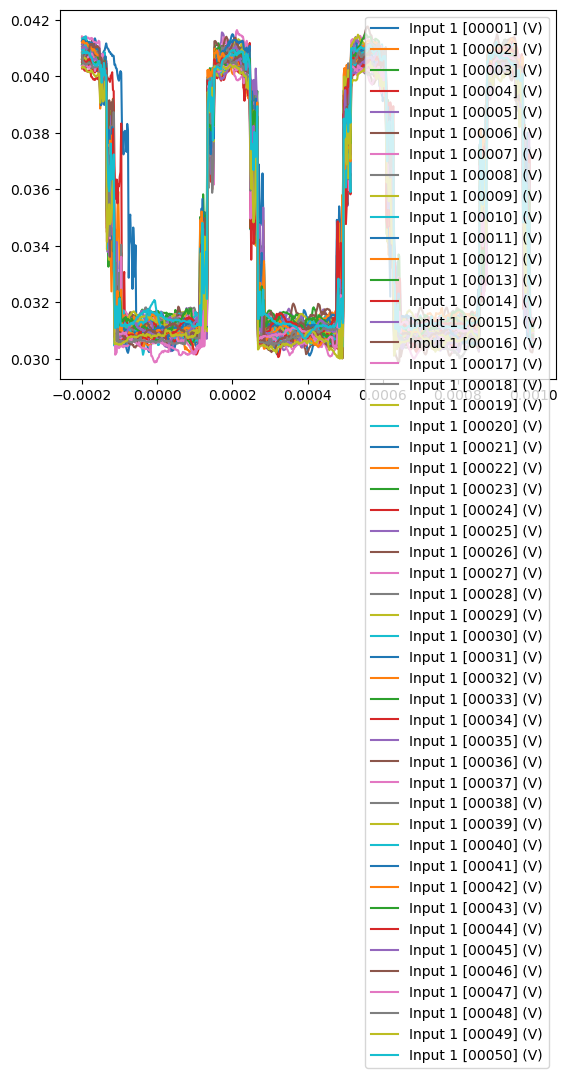

In [3]:
import re
for filename in os.listdir("30-6-23"):
    if filename.endswith(".dat") and re.findall("(Flux_TDep)", filename): 
        path = os.path.join("30-6-23", filename)
        print(path)
        df = pd.read_csv(path, skiprows=31, delimiter="\t")
        for i, col in enumerate(df.columns):
            if i != 0 and re.findall("((Input)+)", col) and not re.findall("(bwd)+", col):
                plt.plot(df[df.columns[0]], df[col], label = col)
        plt.legend()
        plt.show()
    else:
        continue

### Plotting the selected file

In [39]:
file_select = pd.read_csv("file_selection.csv", skiprows=1, delimiter="\t")
file_select


Temperature                                    Files
0            11      30-6-23\Flux_TDep_11mK_x2000001.dat
1            20      30-6-23\Flux_TDep_20mK_x2000001.dat
2            30      30-6-23\Flux_TDep_30mK_x2000001.dat
3            40      30-6-23\Flux_TDep_40mK_x2000001.dat
4            50          30-6-23\Flux_TDep_50mK00001.dat
5            60          30-6-23\Flux_TDep_60mK00001.dat
6            80          30-6-23\Flux_TDep_80mK00001.dat
7            90          30-6-23\Flux_TDep_90mK00001.dat
8           100         30-6-23\Flux_TDep_100mK00001.dat
9           110         30-6-23\Flux_TDep_110mK00001.dat
10          120         30-6-23\Flux_TDep_120mK00001.dat
11          130       30-6-23\Flux_TDep_130mK_300001.dat
12          140    30-6-23\Flux_TDep_140mK_redo00001.dat
13          150  30-6-23\Flux_TDep_150mK_repeat00001.dat
14          170         30-6-23\Flux_TDep_170mK00001.dat
15          200         30-6-23\Flux_TDep_200mK00001.dat
16          250         30-6-23\Flux_TDep_250mK00001.dat
17          300       30-6-23\Flux_TDep_300mK_200001.dat
18          350       30-6-23\Flux_TDep_350mK_200001.dat
19          400       30-6-23\Flux_TDep_400mK_200001.dat

11mK


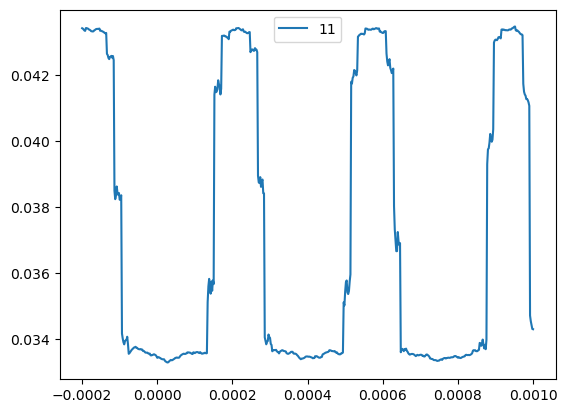

20mK


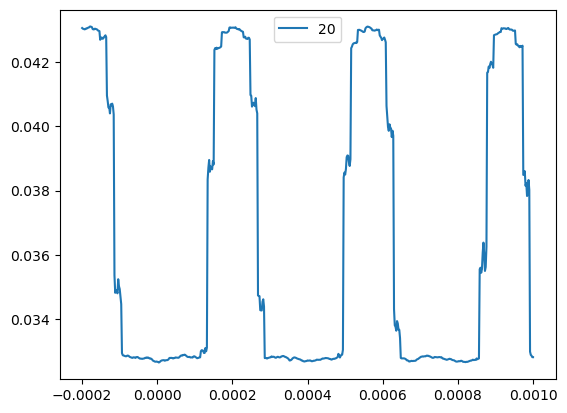

30mK


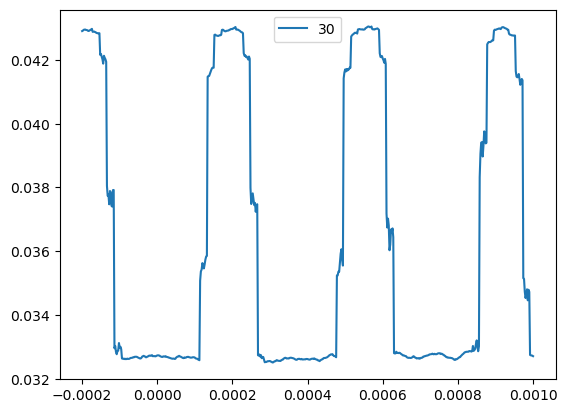

40mK


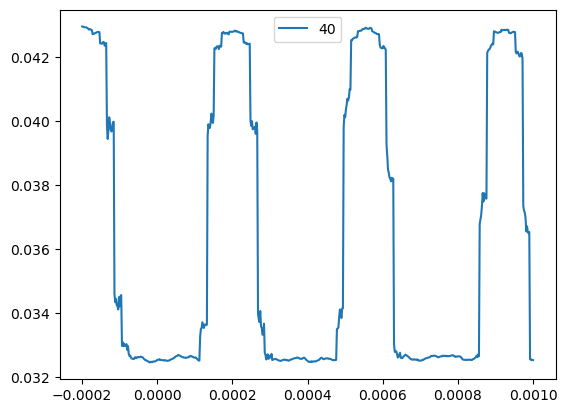

50mK


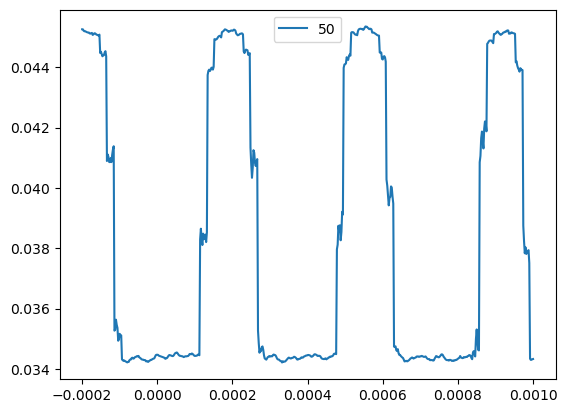

60mK


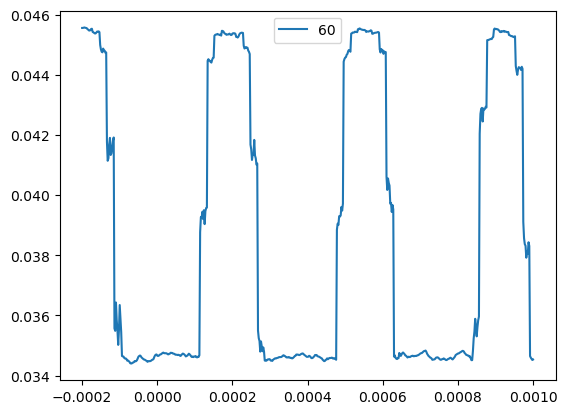

80mK


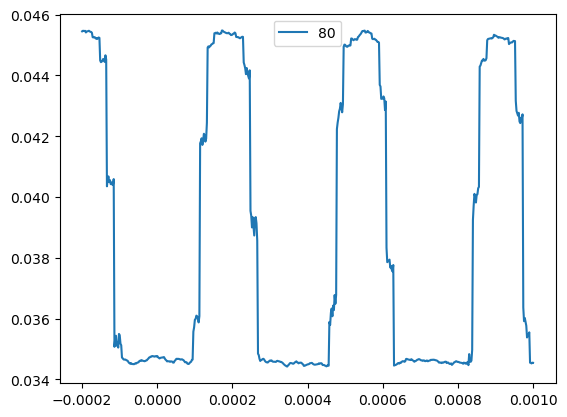

90mK


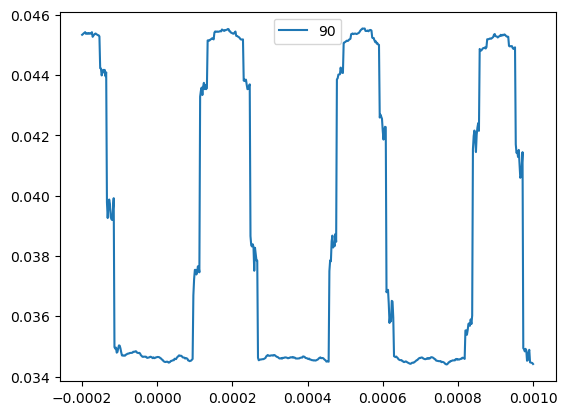

100mK


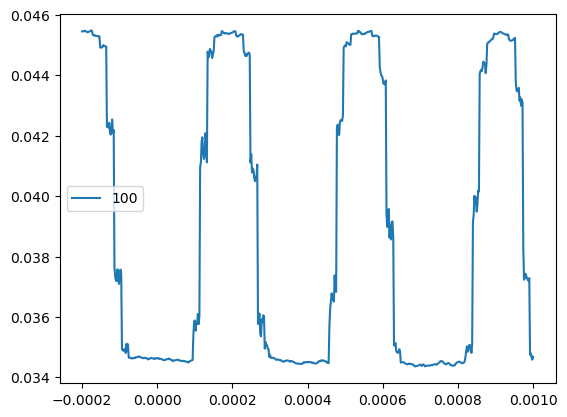

110mK


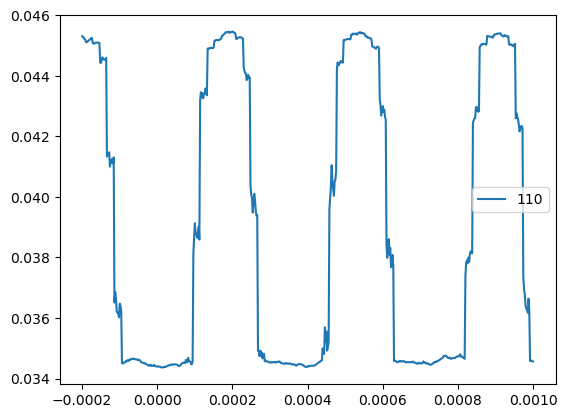

120mK


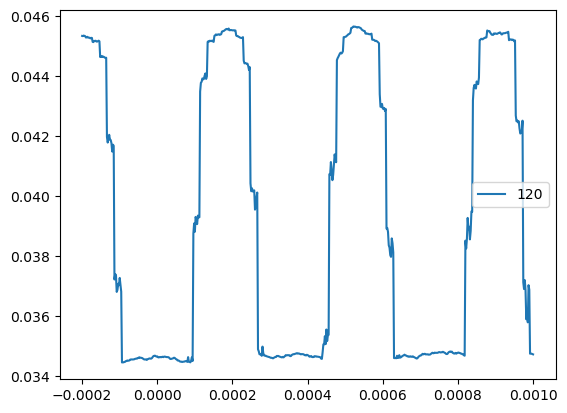

130mK


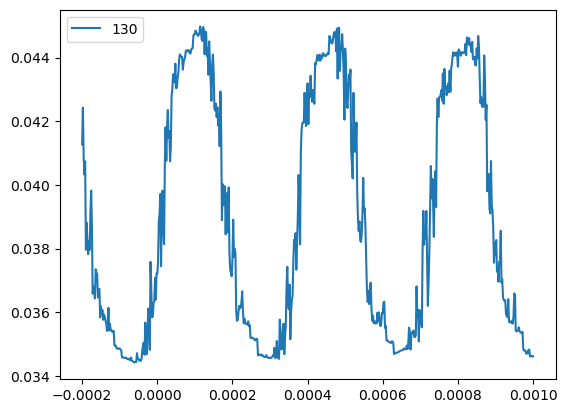

140mK


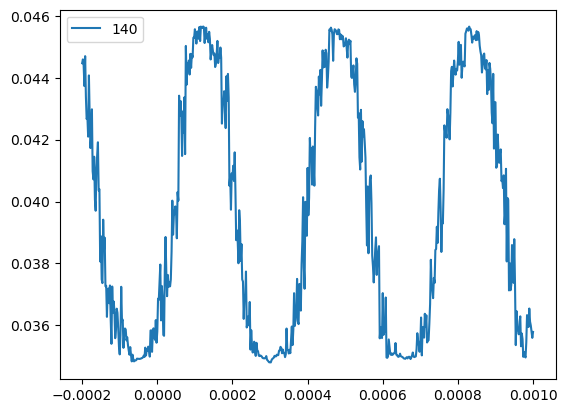

150mK


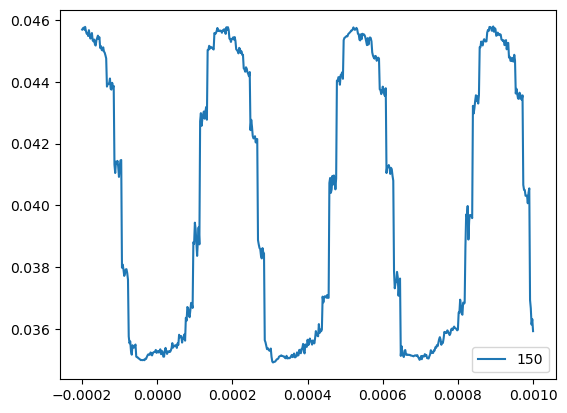

170mK


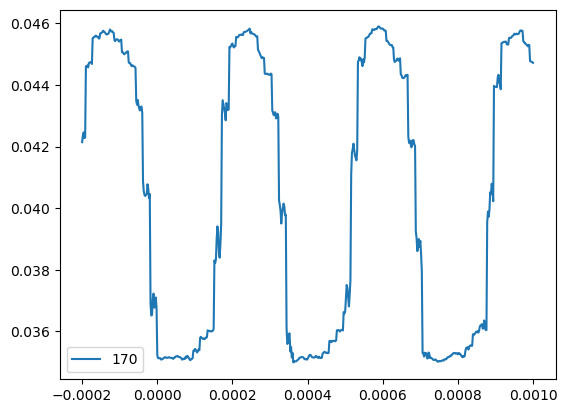

200mK


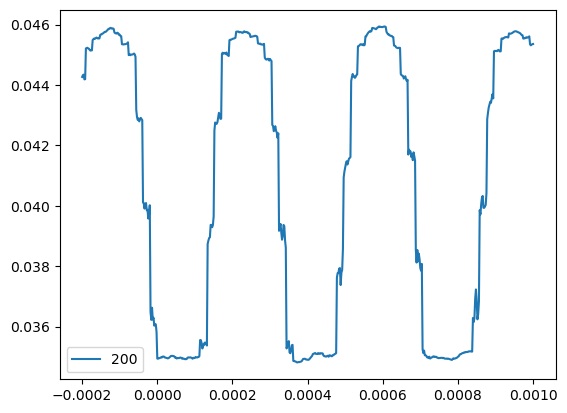

250mK


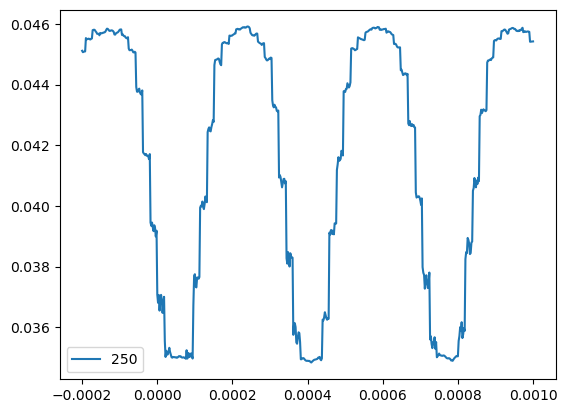

300mK


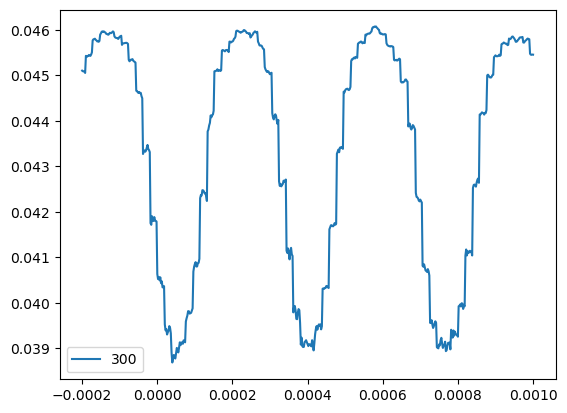

350mK


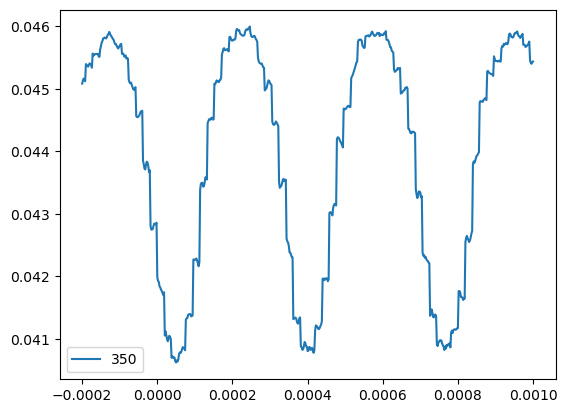

400mK


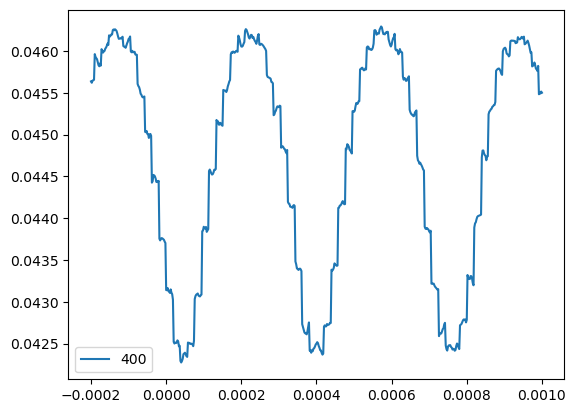

In [44]:
averaged_df_dict = {}

for i, temp in enumerate(file_select["Temperature"]):
    df = pd.read_csv(file_select["Files"][i], delimiter="\t", skiprows=31)
    print(f"{temp}mK")
    number_of_sweeps = 0
    for j, col in enumerate(df.columns):
        if j!= 0 and re.findall("Input", col) and not re.findall("bwd", col):
            if len(forward_current) == 0:
                forward_current = np.array(df[col].values)
            else:
                forward_current += np.array(df[col].values)
            number_of_sweeps += 1
    forward_current /= number_of_sweeps

    df_new = pd.DataFrame({"Out": df[df.columns[0]], "Current": forward_current})
    averaged_df_dict[str(temp)] = df_new
    plt.plot(df_new["Out"], df_new["Current"], label = str(temp))
    plt.legend()
    plt.show()
    

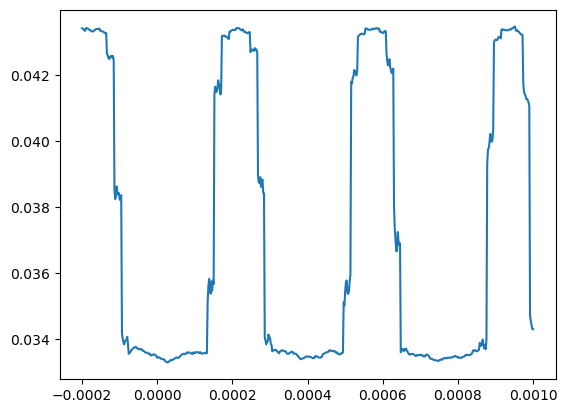

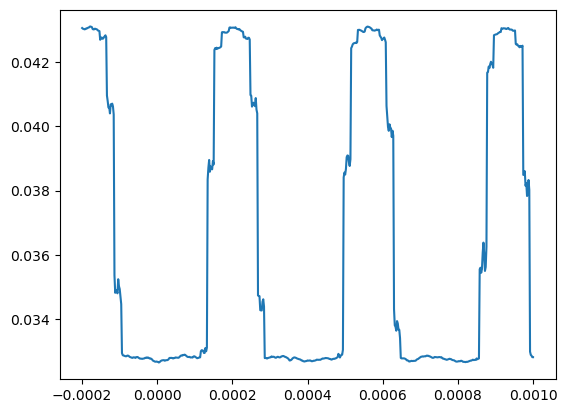

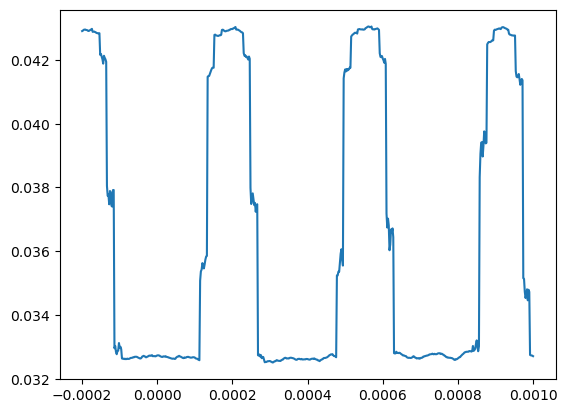

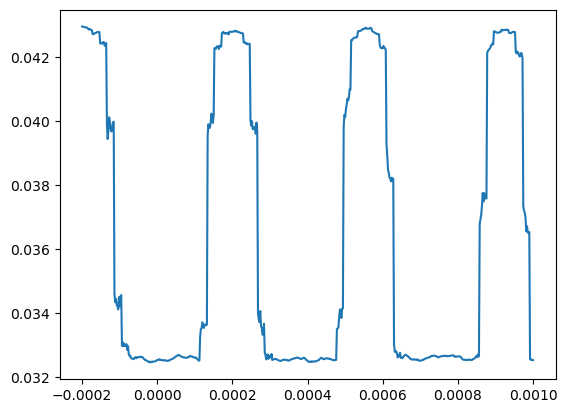

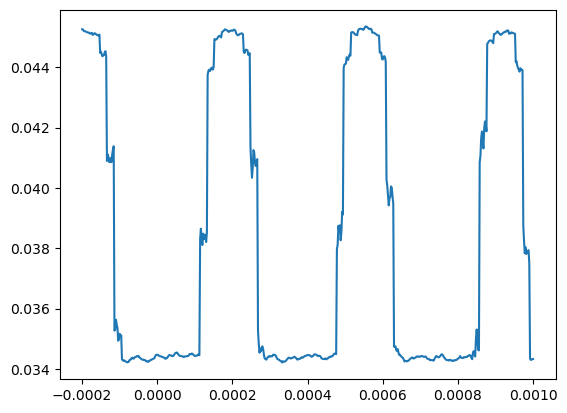

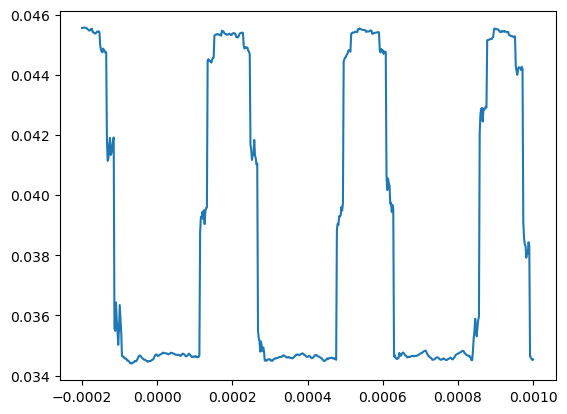

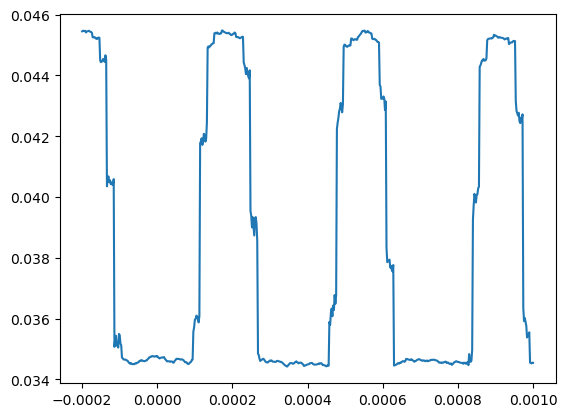

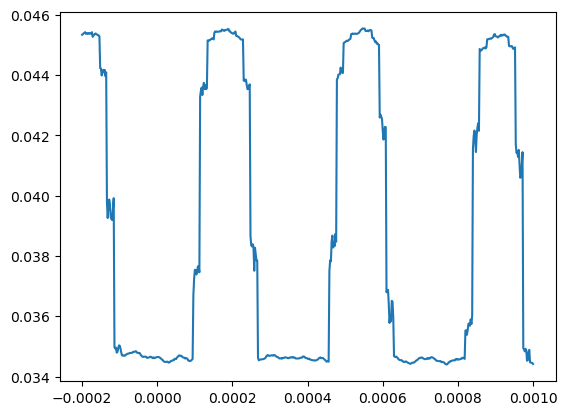

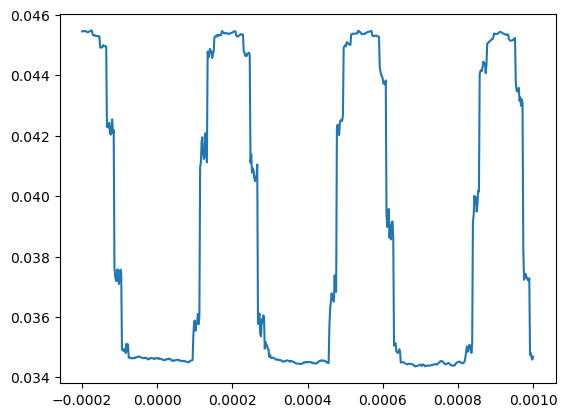

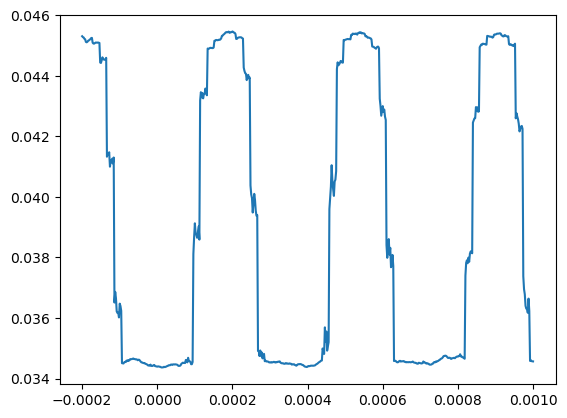

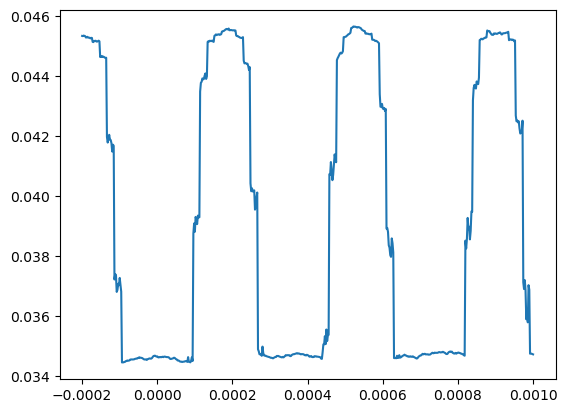

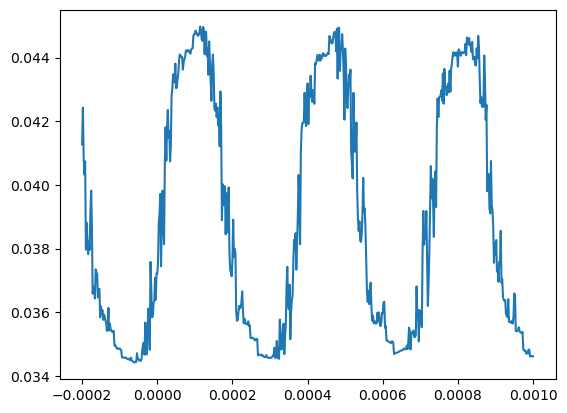

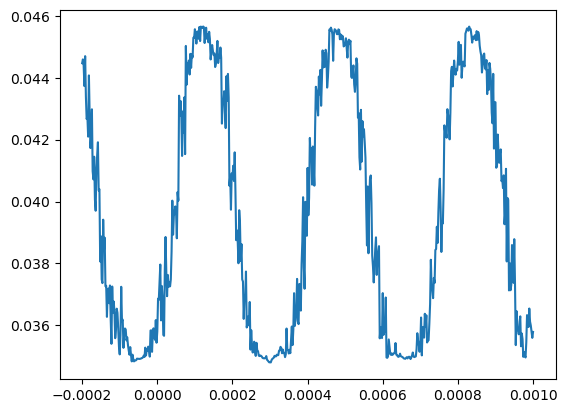

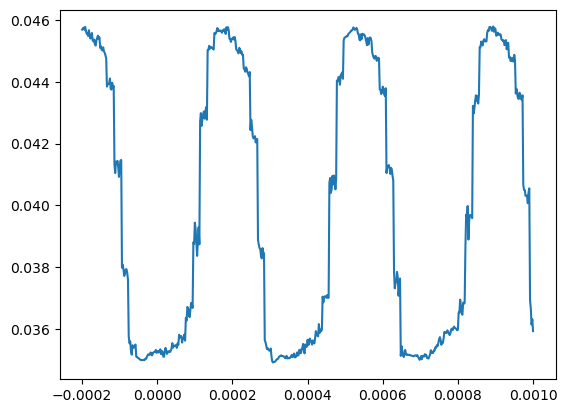

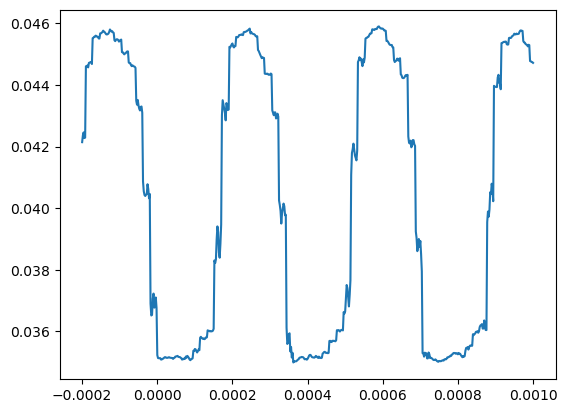

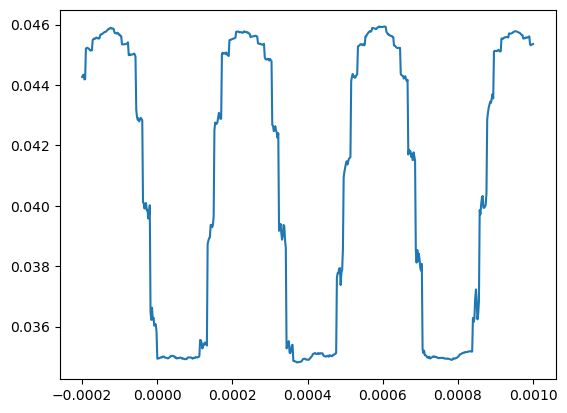

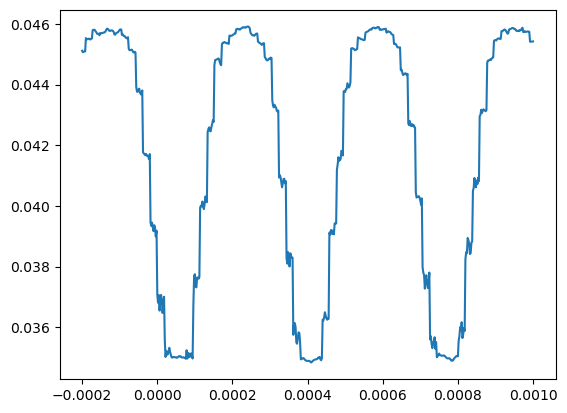

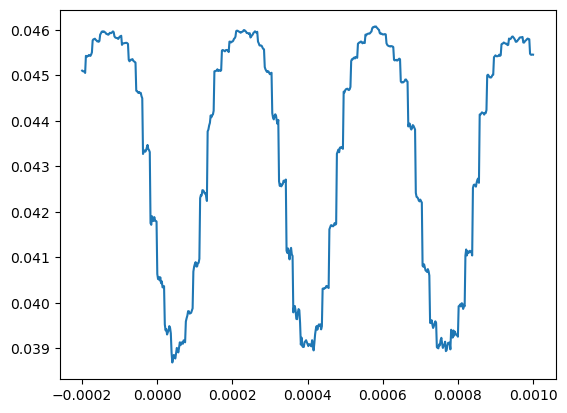

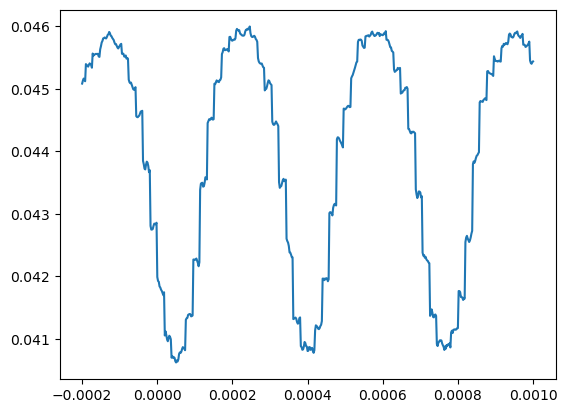

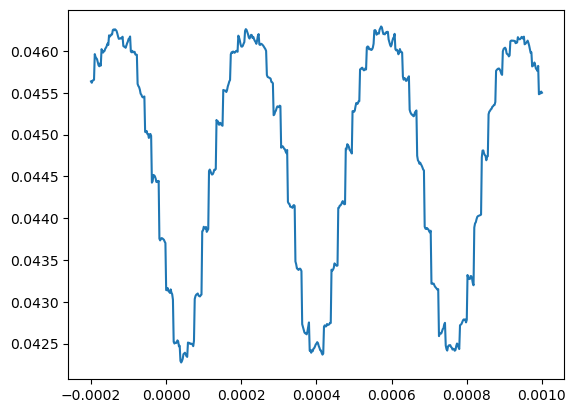

In [47]:
from scipy.fft import fft, fftfreq

for key, value in averaged_df_dict.items():
    x = value["Out"]
    y = value["Current"]
    yf = fft(y)
    xf = fftfreq(len(x), np.abs(x[0] - x[1]))[:len(x)//2]